# Linear Regression for Petroleum

## Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Importing the dataset

In [12]:
datasetTemp = pd.read_csv('../csv/products/petroleum.csv')
XTemp = datasetTemp['quarter'].values.reshape(-1, 1)
yTemp = datasetTemp['total_price'].values.reshape(-1, 1)

datasetTariff = pd.read_csv('../csv/tariff.csv')
XTariff = datasetTemp['total_price'].values.reshape(-1, 1)
yTariff = datasetTariff['tariff_per_kwh'].values.reshape(-1, 1)


## Splitting the dataset into the Training set and Test set

In [13]:
X_trainTemp, X_testTemp, y_trainTemp, y_testTemp = train_test_split(XTemp, yTemp, test_size = 0.2, random_state = 0)
X_trainTariff, X_testTariff, y_trainTariff, y_testTariff = train_test_split(XTariff, yTariff, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [14]:
regressorTemp = LinearRegression()
regressorTemp.fit(X_trainTemp, y_trainTemp)
regressorTariff = LinearRegression()
regressorTariff.fit(X_trainTariff, y_trainTariff)

LinearRegression()

## Predict Crude Oil


In [15]:
#Predict Maintenance
#To retrieve the intercept:
print("y intercept: " + str(regressorTemp.intercept_))
#For retrieving the slope:
print("slope: " + str(regressorTemp.coef_))

# y = a+bx
# test data and see how accurately our algorithm predicts the percentage score.
y_predTemp = regressorTemp.predict(X_testTemp)

# mae, msq, rmse
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testTemp, y_predTemp))
print('Mean Squared Error:', metrics.mean_squared_error(y_testTemp, y_predTemp))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_testTemp, y_predTemp)))

y = regressorTemp.intercept_ + (regressorTemp.coef_* 2022.1)
print("Predicted Petroleum: 2022 Quarter 1: " + str(y))

y intercept: [59184.67145573]
slope: [[-28.98376265]]
Mean Absolute Error: 60.93202315326939
Mean Squared Error: 4274.689474540072
Root Mean Squared Error: 65.3811094624439
Predicted Petroleum: 2022 Quarter 1: [[576.60499266]]


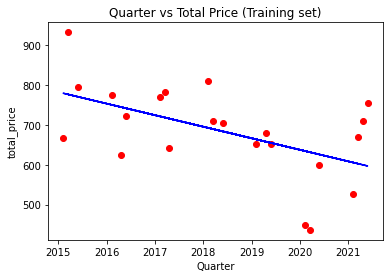

In [16]:
# show training set
plt.scatter(X_trainTemp, y_trainTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('Quarter vs Total Price (Training set)')
plt.xlabel('Quarter')
plt.ylabel('total_price')
plt.show()


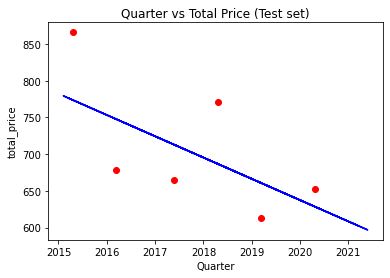

In [17]:
# show test set
plt.scatter(X_testTemp, y_testTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('Quarter vs Total Price (Test set)')
plt.xlabel('Quarter')
plt.ylabel('total_price')
plt.show()

## Predict Tariff

In [18]:
#To retrieve the intercept:
print("y intercept: " + str(regressorTariff.intercept_))
#For retrieving the slope:
print("slope: " + str(regressorTariff.coef_))

# y = a+bx
# test data and see how accurately our algorithm predicts the percentage score.
y_predTariff = regressorTariff.predict(X_testTariff)

# mae, msq, rmse
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testTariff, y_predTariff))
print('Mean Squared Error:', metrics.mean_squared_error(y_testTariff, y_predTariff))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_testTariff, y_predTariff)))

y = regressorTariff.intercept_ + (regressorTariff.coef_* y)
print("Predicted Tariff: 2022 Quarter 1: " + str(y))

y intercept: [25.37057857]
slope: [[-0.0050981]]
Mean Absolute Error: 2.095554970536142
Mean Squared Error: 5.674157361479751
Root Mean Squared Error: 2.382048983853974
Predicted Tariff: 2022 Quarter 1: [[22.4309874]]


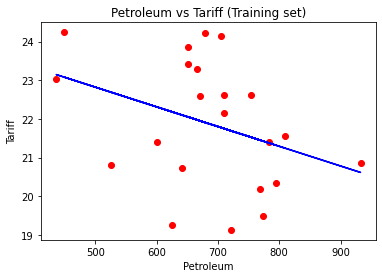

In [19]:
# show training set
plt.scatter(X_trainTariff, y_trainTariff, color='red')
plt.plot(X_trainTariff, regressorTariff.predict(X_trainTariff), color='blue')
plt.title('Petroleum vs Tariff (Training set)')
plt.xlabel('Petroleum')
plt.ylabel('Tariff')
plt.show()

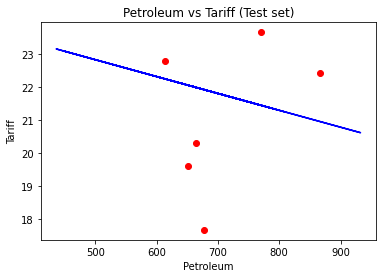

In [20]:
# # show test set
plt.scatter(X_testTariff, y_testTariff, color='red')
plt.plot(X_trainTariff, regressorTariff.predict(X_trainTariff), color='blue')
plt.title('Petroleum vs Tariff (Test set)')
plt.xlabel('Petroleum')
plt.ylabel('Tariff')
plt.show()
